# CHEM E 545: Midterm Project (60 points)

In this project, we want to predict biodegradibility of different compounds. Supervised Machine Learning (SML) is an important tool that can take into account multiple attributes about a compound including its chemical structure and predict its biodegradability in the environment. SML models can help in figuring out which chemicals are going to be environment friendly helping in making responsible choices during chemical selection for different processes/products.

In this project, wherever you need to use a random_state/seed use the number 100. All plots should have title and labels

## Part (a): Regression Task
###  Data Preparation: (15 points)
Load the data file. Your data contains a feature called as 'Smiles'. The simplified molecular-input line-entry system (SMILES) is a specification in the form of a line notation for describing the structure of chemical species using short ASCII strings. You can read more [here](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system).

We want to convert this string to actual molecular descriptors. <b> Hint </b>: You will have a total of 209 descriptors for each Smiles string. You can do that by using [rdkit](https://www.rdkit.org/) package and its descriptors. You can import these as follows:

In [5]:
# Importing the rdkit
!pip install rdkit
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Importing the library
from sklearn import datasets, linear_model
from sklearn.datasets import load_iris
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Other than smiles, your dataset has 5 other features and one target/output variable (biodegradation percentage). You are trying to build a model using all the features to predict the percentage biodegradation. Therefore, combine the 209 descriptors with the 5 remaining features from your dataset. Next, remove any rows that contains NaNs. Finally, remove any feature that still contains a smiles string and the feature 'Ipc'.

# 1.DATA READING AND CLEANING

In [7]:
# Reading the reg_data file
reg_data_copy = pd.read_excel('reg_data_545_midterm (1).xlsx')
reg_data_1 = reg_data_copy
reg_data_copy.head()

,Smiles,Reliability,Type,StandardTest,System_setup,reaction_time,Biodegradation
0,NC12CC3CC(CC(C3)C1)C2.[Cl-].[H+],2,Inherent,Test 302 B,DOC Die Away,28.0,0.10
1,Cl[Si](Cl)(c1ccccc1)c1ccccc1,1,Ready,Test 301 C,Closed Respirometer,28.0,0.00
2,[O-][n+]1ccccc1[S-][Zn+2][S-]c1cccc[n+]1[O-],1,Ready,Test 301 B,CO2 Evolution,8.0,0.17
3,CC(CC=O)CC(C)(C)C,1,Ready,Test 301 C,Closed Respirometer,28.0,0.07
4,O=c1c2cccc3cccc(c32)c2nc3cccc4cccc(c43)n12,1,Ready,Test 301 F,Closed Respirometer,14.0,0.01


In [8]:
#Create the list of all molecular descriptor head
list = Descriptors._descList

columns = []
for i,j in list:
  columns.append(i)

columns

['MaxAbsEStateIndex',
 'MaxEStateIndex',
 'MinAbsEStateIndex',
 'MinEStateIndex',
 'qed',
 'SPS',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'AvgIpc',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',


In [9]:
#Read the molecular descriptor from Rdkit for each molecule and add to a dataframe
def calculate_descriptors(smiles):
    molecule = Chem.MolFromSmiles(smiles)
    descriptors = Descriptors.CalcMolDescriptors(molecule)
    return descriptors



reg_data_1=pd.DataFrame(columns=columns)

for i in range(0,len(reg_data_copy)):
    descriptors = calculate_descriptors(reg_data_copy['Smiles'][i])
    reg_data_1.loc[len(reg_data_1)] = descriptors

reg_data_1.shape

[15:06:23] WARNING: not removing hydrogen atom without neighbors
[15:06:23] WARNING: not removing hydrogen atom without neighbors
[15:06:23] WARNING: not removing hydrogen atom without neighbors
[15:06:23] WARNING: not removing hydrogen atom without neighbors
[15:06:23] WARNING: not removing hydrogen atom without neighbors
[15:06:23] WARNING: not removing hydrogen atom without neighbors
[15:06:27] WARNING: not removing hydrogen atom without neighbors
[15:06:27] WARNING: not removing hydrogen atom without neighbors
[15:06:27] WARNING: not removing hydrogen atom without neighbors
[15:06:29] WARNING: not removing hydrogen atom without neighbors
[15:06:29] WARNING: not removing hydrogen atom without neighbors
[15:06:29] WARNING: not removing hydrogen atom without neighbors
[15:06:36] WARNING: not removing hydrogen atom without neighbors
[15:06:36] WARNING: not removing hydrogen atom without neighbors
[15:06:36] WARNING: not removing hydrogen atom without neighbors
[15:06:36] WARNING: not r

(10000, 211)

In [11]:
#Convert Molecular descriptor to file
reg_data_1.to_csv("descriptors.csv")
reg_data_1.head()


,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,SPS
0,6.320833,6.320833,0.000000,0.000000,0.519261,55.250000,187.714,169.570,187.112777,70,...,0,0,0,0,0,0,0,0,0,55.250000
1,6.491327,6.491327,1.027346,-2.511080,0.569960,11.333333,253.204,243.124,251.992882,76,...,0,0,0,0,0,0,0,0,0,11.333333
2,11.378134,11.378134,0.716093,-1.077315,0.349414,11.058824,317.710,309.646,315.931862,84,...,0,0,0,0,0,0,0,0,0,11.058824
3,10.101122,10.101122,0.363519,0.363519,0.553535,14.800000,142.242,124.098,142.135765,60,...,0,0,0,0,0,0,0,0,0,14.800000
4,13.332122,13.332122,0.009210,-0.009210,0.299012,12.160000,320.351,308.255,320.094963,116,...,0,0,0,0,0,0,0,0,0,12.160000


In [12]:
reg_data_1.shape

(10000, 211)

In [13]:
#Joining reg_data and molecular descriptor to one file
reg_data = reg_data_copy.join(reg_data_1)

In [14]:
#Read combined dataframe
reg_data.head()

,Smiles,Reliability,Type,StandardTest,System_setup,reaction_time,Biodegradation,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,SPS
0,NC12CC3CC(CC(C3)C1)C2.[Cl-].[H+],2,Inherent,Test 302 B,DOC Die Away,28.0,0.10,6.320833,6.320833,0.000000,...,0,0,0,0,0,0,0,0,0,55.250000
1,Cl[Si](Cl)(c1ccccc1)c1ccccc1,1,Ready,Test 301 C,Closed Respirometer,28.0,0.00,6.491327,6.491327,1.027346,...,0,0,0,0,0,0,0,0,0,11.333333
2,[O-][n+]1ccccc1[S-][Zn+2][S-]c1cccc[n+]1[O-],1,Ready,Test 301 B,CO2 Evolution,8.0,0.17,11.378134,11.378134,0.716093,...,0,0,0,0,0,0,0,0,0,11.058824
3,CC(CC=O)CC(C)(C)C,1,Ready,Test 301 C,Closed Respirometer,28.0,0.07,10.101122,10.101122,0.363519,...,0,0,0,0,0,0,0,0,0,14.800000
4,O=c1c2cccc3cccc(c32)c2nc3cccc4cccc(c43)n12,1,Ready,Test 301 F,Closed Respirometer,14.0,0.01,13.332122,13.332122,0.009210,...,0,0,0,0,0,0,0,0,0,12.160000


In [15]:
reg_data.shape

(10000, 218)

# 2.DATA CLEANING

In [17]:
#Drop nan values
reg_data_cleaned=reg_data.dropna(inplace=False)

reg_data_cleaned.shape

(8832, 218)

In [18]:
# Drop non-numerical values
reg_data_cleaned = reg_data_cleaned.drop(columns=['Smiles'])
reg_data_cleaned = reg_data_cleaned.drop(columns=['Ipc'])


In [19]:
reg_data_cleaned.head()

,Reliability,Type,StandardTest,System_setup,reaction_time,Biodegradation,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,SPS
0,2,Inherent,Test 302 B,DOC Die Away,28.0,0.1000,6.320833,6.320833,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,55.250000
1,1,Ready,Test 301 C,Closed Respirometer,28.0,0.0000,6.491327,6.491327,1.027346,-2.511080,...,0,0,0,0,0,0,0,0,0,11.333333
3,1,Ready,Test 301 C,Closed Respirometer,28.0,0.0700,10.101122,10.101122,0.363519,0.363519,...,0,0,0,0,0,0,0,0,0,14.800000
4,1,Ready,Test 301 F,Closed Respirometer,14.0,0.0100,13.332122,13.332122,0.009210,-0.009210,...,0,0,0,0,0,0,0,0,0,12.160000
5,1,Ready,Test 301 B,CO2 Evolution,28.0,0.0593,10.818153,10.818153,0.576637,-0.908344,...,0,0,0,0,0,0,0,0,0,13.000000


In [20]:
reg_data_cleaned.to_excel("reg_data_cleaned.xlsx",sheet_name='Sheet_name_1') 

In [21]:
#Cleaned file name as df for ease of typing
df = reg_data_cleaned
df.shape

(8832, 216)

In [92]:
#One Hot Encoding
# Converted Type ,Standard Test ,System Setup from string to nominal data type
dfle = pd.get_dummies(df, columns = ['Type', 'StandardTest', 'System_setup'])
dfle.head()

,Reliability,reaction_time,Biodegradation,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,StandardTest_7,StandardTest_8,StandardTest_9,StandardTest_10,StandardTest_11,StandardTest_12,System_setup_0,System_setup_1,System_setup_2,System_setup_3
0,2,28.0,0.1000,6.320833,6.320833,0.000000,0.000000,0.519261,55.250000,187.714,...,0,0,0,1,0,0,0,0,0,1
1,1,28.0,0.0000,6.491327,6.491327,1.027346,-2.511080,0.569960,11.333333,253.204,...,0,0,0,0,0,0,0,0,1,0
3,1,28.0,0.0700,10.101122,10.101122,0.363519,0.363519,0.553535,14.800000,142.242,...,0,0,0,0,0,0,0,0,1,0
4,1,14.0,0.0100,13.332122,13.332122,0.009210,-0.009210,0.299012,12.160000,320.351,...,0,0,1,0,0,0,0,0,1,0
5,1,28.0,0.0593,10.818153,10.818153,0.576637,-0.908344,0.315336,13.000000,458.001,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#One Hot Encoding
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

In [ ]:
# Converting categorial variable Type,StandardTest and System setup to numerical type
#dfle = df
#dfle.Type=le.fit_transform(dfle.Type)
#dfle.StandardTest = le.fit_transform(dfle.StandardTest)
#dfle.System_setup =le.fit_transform(dfle.System_setup)
#dfle.head()

In [93]:
dfle.shape

(8832, 216)

In [94]:
dfle.describe()

,Reliability,Type,StandardTest,System_setup,reaction_time,Biodegradation,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,SPS
count,8832.000000,8832.000000,8832.000000,8832.000000,8832.000000,8832.000000,8832.000000,8832.000000,8832.000000,8832.000000,...,8832.000000,8832.000000,8832.000000,8832.000000,8832.000000,8832.000000,8832.000000,8832.000000,8832.000000,8832.000000
mean,1.280910,0.908401,6.946784,1.492527,22.671578,0.391660,8.930692,8.930692,0.401711,-0.489081,...,0.008492,0.004982,0.003397,0.002264,0.005774,0.000453,0.001925,1.996037,0.022192,14.725601
std,0.449469,0.288475,2.316361,0.987609,11.837930,0.354642,3.275173,3.275173,0.495574,1.512619,...,0.095395,0.070410,0.058186,0.058241,0.078706,0.026062,0.043833,5.248732,0.181730,8.993958
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.500000,0.000000,-10.050093,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,5.000000,1.000000,14.000000,0.035000,5.800639,5.800639,0.088380,-0.785342,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.933333
50%,1.000000,1.000000,7.000000,2.000000,28.000000,0.310000,10.089815,10.089815,0.240713,-0.182275,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.370370
75%,2.000000,1.000000,9.000000,2.000000,28.000000,0.739000,11.319712,11.319712,0.583333,0.355278,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,14.888889
max,2.000000,1.000000,12.000000,3.000000,214.000000,1.000000,16.169670,16.169670,7.853531,4.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,99.000000,4.000000,69.083333


# 3.MODEL FITTING

In [95]:
# print the shape of your resultant x(input) and y (output) data

In [96]:
y = dfle['Biodegradation']
y.shape

(8832,)

In [97]:
X = dfle.drop(columns ='Biodegradation')
X.shape

(8832, 215)

In [98]:
# Create a linear regression object
reg_model = linear_model.LinearRegression()

###  Model Developement and Testing: (15 points)

Implement linear regression using your data. Plot the boxplot of R2 values for a test split of [0.4,0.35,0.3,0.25,0.2,0.1]. Also plot your predicted and actual values as a scatter plot at the test split of 0.1.

In [99]:
#fit the model with different test_size
test_size = [0.4,0.35,0.3,0.25,0.2,0.1]
r2=[]
# Split the data into training/testing sets (80:20 split)
for n in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= n, random_state= 100)
    #model training
    reg_model.fit(X_train, y_train)
    # predictions using the trained model
    y_pred = reg_model.predict(X_test)
    r2.append(r2_score(y_test, y_pred))


In [100]:
#Rsquared values
print(r2)

[0.29022201919575097, 0.302061743107613, 0.30307905873972674, 0.29691176263806895, -597.0545879378406, 0.3270735971702754]


In [101]:
#Data feame for r2 value for each test size
df_r2=pd.DataFrame(np.column_stack([test_size, r2]), columns=['test_size', 'Rsquared'])
df_r2.head()

,test_size,Rsquared
0,0.40,0.290222
1,0.35,0.302062
2,0.30,0.303079
3,0.25,0.296912
4,0.20,-597.054588


<Axes: >

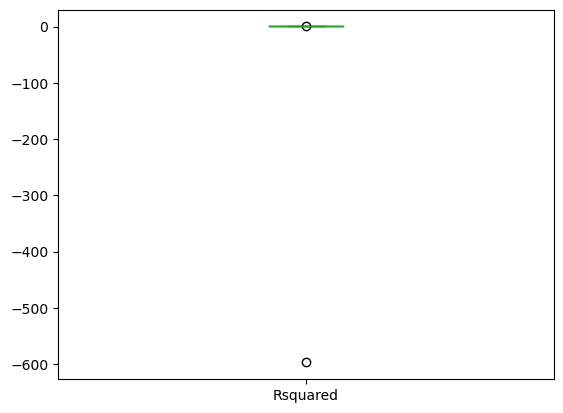

In [102]:
#Plot Boxplot for R2 values
df_r2.plot(kind='box', y=['Rsquared'])

# 4.PLOTTING

In [103]:
#plot your predicted and actual values as a scatter plot at the test split of 0.1.

In [104]:
#test_size=0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 100)
#model training
reg_model.fit(X_train, y_train)
# predictions using the trained model
y_pred = reg_model.predict(X_test)

In [105]:
y_pred.shape

(884,)

In [106]:
y_test.shape

(884,)

In [107]:
#Index set made for X values as X values are matrix
index=[]
for i in range(0,len(y_test)):
    index.append(i)

In [108]:
#Dataframe for index,y_test,y_pred

df_box=pd.DataFrame(np.column_stack([index,y_test, y_pred]),
                               columns=['index','y_test', 'y_pred'])


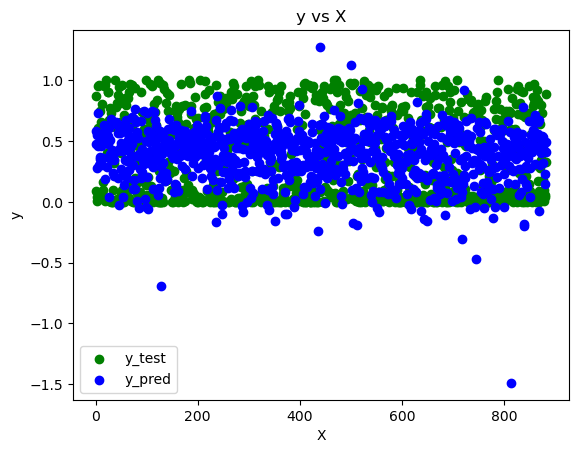

In [109]:
#Plot scatter graph between y test and predicted
fig, ax = plt.subplots()
ax.scatter(df_box['index'], df_box['y_test'], color='green', label='y_test')
ax.scatter(df_box['index'], df_box['y_pred'], color='blue', label='y_pred')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('y vs X')
plt.legend()

In [110]:
# Plotting the graph y_pred vs y_test

Text(0.5, 1.0, 'y_test versus y_pred')

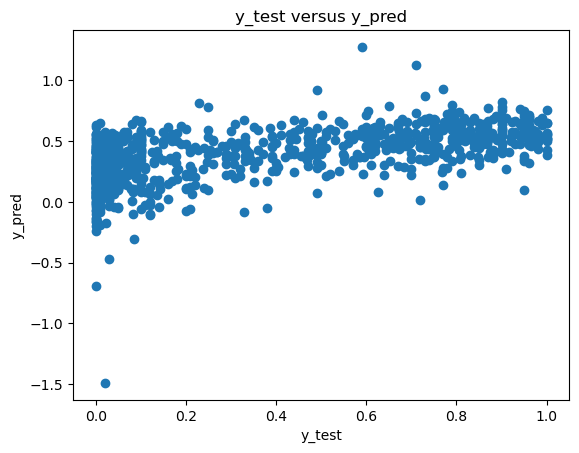

In [111]:
plt.scatter(df_box['y_test'],df_box['y_pred'])
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_test versus y_pred')

In [112]:
#Implement a new regression algorithm of your choice here

In [113]:
#Implement a new regression algorithm of your choice here
# New Regression Model: BayesianRidge()

In [114]:
from sklearn import linear_model

In [115]:
model = linear_model.BayesianRidge()

In [116]:

#model training
model.fit(X_train, y_train)
# predictions using the trained model
y_pred = model.predict(X_test)

In [117]:
model.score(X,y)

0.3370599740004654

## Part (b): Classification Task
### Data Preparation (5 points)
Load the data file. Your data contains a feature called as 'Smiles'. Use the same code as before to convert it into actual molecular descriptors. <b> Hint </b>: You will have a total of 209 descriptors for each Smiles string. Next, remove any rows that contains NaNs. Finally, remove any feature that still contains a smiles string and the feature 'Ipc'. Class labels of 0 and 1 are also provided in the data file. 1 is biodegradable and 0 is not biodegradable.

# 1.DATA READING AND ADDING MOLECULAR DESCRIPTOR

In [51]:
# Reading class data file
class_data_copy = pd.read_excel('class_data_545_midterm.xlsx')
class_data_1 = class_data_copy
class_data_copy.head()

,Smiles,Class
0,COc1c2occc2cc2ccc(=O)oc12,0
1,CCCCC(CC)COC(=O)C(C#N)=C(c1ccccc1)c1ccc(OC)cc1,0
2,C[C@H](CO)CCCC1CCCCC1,1
3,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2CC[C@]2(C)[...,1
4,CCCCCCCCCCCCCCC/C=C/CC1CC(=O)OC1=O,0


In [52]:
# Create list of descriptor name
list = Descriptors._descList

columns = []
for i,j in list:
  columns.append(i)

def calculate_descriptors(smiles):
    molecule = Chem.MolFromSmiles(smiles)
    descriptors = Descriptors.CalcMolDescriptors(molecule)
    return descriptors

In [53]:
# Create DataFrame for molecular descriptor
class_data_1=pd.DataFrame(columns=columns)

for i in range(0,len(class_data_copy)):
    descriptors = calculate_descriptors(class_data_copy['Smiles'][i])
    class_data_1.loc[len(class_data_1)] = descriptors

[15:17:49] WARNING: not removing hydrogen atom without neighbors
[15:17:49] WARNING: not removing hydrogen atom without neighbors
[15:17:49] WARNING: not removing hydrogen atom without neighbors
[15:17:53] WARNING: not removing hydrogen atom without neighbors
[15:17:53] WARNING: not removing hydrogen atom without neighbors
[15:17:53] WARNING: not removing hydrogen atom without neighbors
[15:17:54] WARNING: not removing hydrogen atom without neighbors
[15:17:54] WARNING: not removing hydrogen atom without neighbors
[15:17:54] WARNING: not removing hydrogen atom without neighbors
[15:17:58] WARNING: not removing hydrogen atom without neighbors
[15:17:58] WARNING: not removing hydrogen atom without neighbors
[15:17:58] WARNING: not removing hydrogen atom without neighbors
[15:18:11] WARNING: not removing hydrogen atom without neighbors
[15:18:11] WARNING: not removing hydrogen atom without neighbors
[15:18:11] WARNING: not removing hydrogen atom without neighbors
[15:18:19] WARNING: not r

In [54]:
# Converting descriptor file to csv for ease of running
class_data_1.to_csv("class_data_1.csv")

In [55]:
#Combine Molecular descriptor and Class Data
classdata2 = class_data_copy.join(class_data_1)
classdata2.head()

,Smiles,Class,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,SPS
0,COc1c2occc2cc2ccc(=O)oc12,0,11.173100,11.173100,0.405828,-0.405828,0.586359,11.062500,216.192,208.128,...,0,0,0,0,0,0,0,0,0,11.062500
1,CCCCC(CC)COC(=O)C(C#N)=C(c1ccccc1)c1ccc(OC)cc1,0,12.852376,12.852376,0.020103,-0.572111,0.292535,11.241379,391.511,362.279,...,0,0,0,0,0,0,0,0,0,11.241379
2,C[C@H](CO)CCCC1CCCCC1,1,8.871743,8.871743,0.365741,0.365741,0.694302,21.692308,184.323,160.131,...,0,0,0,0,0,0,0,0,0,21.692308
3,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2CC[C@]2(C)[...,1,11.700542,11.700542,0.088987,-0.100305,0.737699,51.952381,286.415,260.207,...,0,0,0,0,0,0,0,0,0,51.952381
4,CCCCCCCCCCCCCCC/C=C/CC1CC(=O)OC1=O,0,11.299171,11.299171,0.240375,-0.375099,0.137965,17.560000,350.543,312.239,...,0,0,0,0,0,0,0,12,0,17.560000


In [56]:
classdata2.shape

(4000, 213)

# 2.DATA CLEANING

In [57]:
#Dropping the values and non numerical entry
classdata2 = classdata2.dropna()
classdata2 =classdata2.drop(columns = ['Ipc'])

classdata2 =classdata2.drop(columns = ['Smiles'])




In [58]:
classdata2.shape

(3544, 211)

In [ ]:
# Convert cleaned file to csv for ease of reading
classdata2.to_csv("class_data_cleaned.csv")

In [59]:
classdata2.shape

(3544, 211)

In [60]:
classdata2.head()

,Class,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,SPS
0,0,11.173100,11.173100,0.405828,-0.405828,0.586359,11.062500,216.192,208.128,216.042259,...,0,0,0,0,0,0,0,0,0,11.062500
1,0,12.852376,12.852376,0.020103,-0.572111,0.292535,11.241379,391.511,362.279,391.214744,...,0,0,0,0,0,0,0,0,0,11.241379
2,1,8.871743,8.871743,0.365741,0.365741,0.694302,21.692308,184.323,160.131,184.182715,...,0,0,0,0,0,0,0,0,0,21.692308
3,1,11.700542,11.700542,0.088987,-0.100305,0.737699,51.952381,286.415,260.207,286.193280,...,0,0,0,0,0,0,0,0,0,51.952381
4,0,11.299171,11.299171,0.240375,-0.375099,0.137965,17.560000,350.543,312.239,350.282095,...,0,0,0,0,0,0,0,12,0,17.560000


# 3.MODEL FITTING

# 3.1 LOGISTIC REGRESSION

In [62]:
# print the shape of your resultant x(input) and y (output) data


In [63]:
y = classdata2['Class']
y.shape

(3544,)

In [64]:
X = classdata2.drop(columns ='Class')
X.shape

(3544, 210)

###  Model Developement and Testing: (15 points)

Implement Logistic Regression. Do you notice something when you use the default solver? Use the solver 'newton-cholesky' to see if the issue resolves. Why could this be happening? Print the test accuracy and the confusion matrix for the test data. Use a test split of 0.2

In [65]:
# Split the data into training/testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 100)

In [66]:
# Create a logistic regression object
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=100)
log_reg.fit(X_train, y_train)


C:\Users\Admin\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=100)

In [70]:
# Predict y values
y_predictions = log_reg.predict(X_test)

# 4.CHECKING ACCURACY

In [71]:
# printing the test accuracy
accuracy = log_reg.score(X_test, y_test)
print(accuracy)

0.770098730606488


In [72]:
print("training set score is : {:.3f}" .format(log_reg.score(X_train,y_train)))
print("test set score is : {:.3f}" .format(log_reg.score(X_test,y_test)))

training set score is : 0.786
test set score is : 0.770


In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test,y_predictions, average='weighted')
recall = recall_score(y_test,y_predictions, average='weighted')
f1_score_value = f1_score(y_test,y_predictions, average='weighted')
print(f'Precision:{precision},Recall:{recall},f1_score:{f1_score_value}')

Precision:0.768797394177841,Recall:0.770098730606488,f1_score:0.7693701196751622


In [75]:
### Confusion Matrix


In [76]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

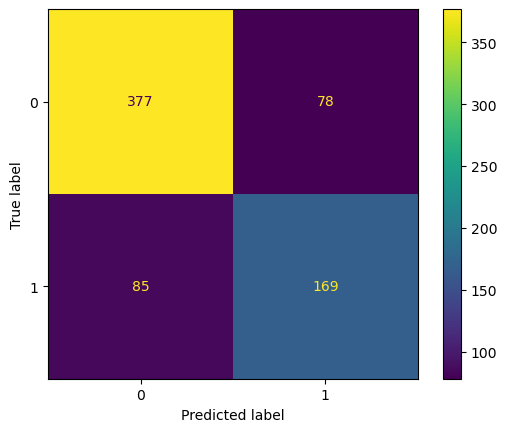

In [77]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predictions)

# 3.2 Newton-cholesky solver

In [78]:
log_reg_new = LogisticRegression(solver = 'newton-cg' ,random_state=100)
log_reg_new.fit(X_train, y_train)

C:\Users\Admin\anaconda4\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(random_state=100, solver='newton-cg')

In [79]:
# predictions using the trained model
y_predictions_new = log_reg_new.predict(X_test)

In [ ]:
# Checking Accuracy

In [80]:
y_predictions_new.shape

(709,)

In [81]:
#Predicting Score 
print("training set score is : {:.3f}" .format(log_reg_new.score(X_train,y_train)))
print("test set score is : {:.3f}" .format(log_reg_new.score(X_test,y_test)))

training set score is : 0.810
test set score is : 0.787


In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [85]:
precision = precision_score(y_test,y_predictions_new, average='weighted')

In [86]:
recall = recall_score(y_test,y_predictions_new, average='weighted')
f1_score_value = f1_score(y_test,y_predictions_new, average='weighted')
print(f'Precision:{precision},Recall:{recall},f1_score:{f1_score_value}')

Precision:0.7880037805284632,Recall:0.7870239774330042,f1_score:0.7874735407257695


In [ ]:
### Confusion Matrix

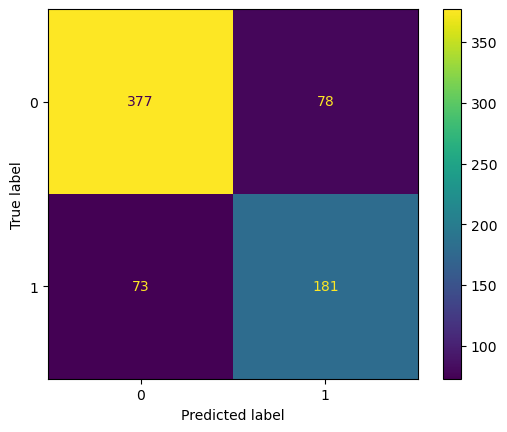

In [87]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predictions_new)

### Something New (5 points)
Plot the ROC curve using the test data for the logistic regression model implemented above

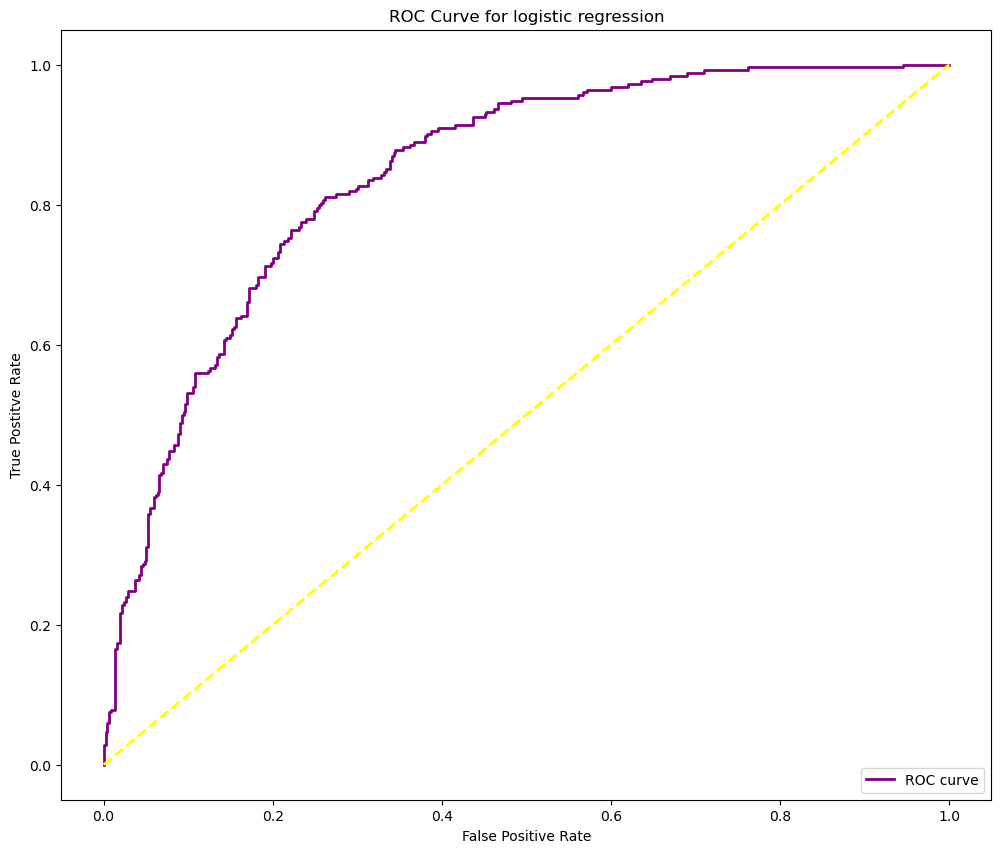

In [90]:
# ROC CURVE FOR LOGISTIC REGRESSION 
from sklearn.metrics import roc_curve, roc_auc_score, auc

# finding the predicted probabilities
y_predict = log_reg.predict_proba(X_test)[:, 1]

#calculating the receiver operating characteristic (ROC) curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)

# plotting the lines
plt.figure(figsize=(12, 10))
plt.plot(fpr, tpr, color='purple', lw=2, label='ROC curve')
plt.plot([0,1], [0,1], color='yellow', lw=2, linestyle='--')

# label x-axis, y-axis, title, and add legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Postitve Rate')
plt.title('ROC Curve for logistic regression')
plt.legend(loc='lower right')

plt.show()

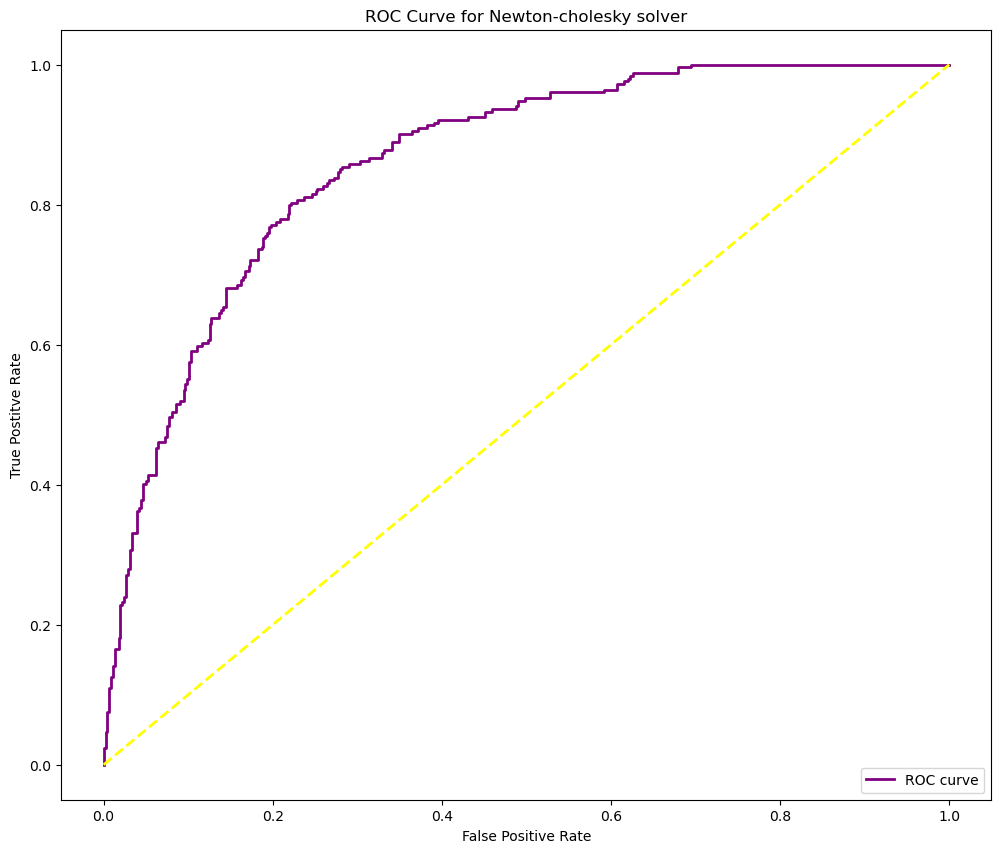

In [91]:
# ROC CURVE FOR LOGISTIC REGRESSION USING Newton-cholesky solver
from sklearn.metrics import roc_curve, roc_auc_score, auc

# finding the predicted probabilities
y_predict = log_reg_new.predict_proba(X_test)[:, 1]

#calculating the receiver operating characteristic (ROC) curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)

# plotting the lines
plt.figure(figsize=(12, 10))
plt.plot(fpr, tpr, color='purple', lw=2, label='ROC curve')
plt.plot([0,1], [0,1], color='yellow', lw=2, linestyle='--')

# label x-axis, y-axis, title, and add legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Postitve Rate')
plt.title('ROC Curve for Newton-cholesky solver')
plt.legend(loc='lower right')

plt.show()
